# Testing SXS catalogue load

Objectives:

1. Test SXS simulation waveform loaded through nrc-catalogue-tools.

## Load the library

In [3]:
import sys

#p1 = "/home/vaishakp/Codes/custom_libraries/nr-catalog-tools"
#libpath = '/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/nr-catalog-tools'
libpath = '/home/vaishakprasad/Documents/Codes/nr-catalog-tools'

if libpath not in sys.path:
    sys.path.append(libpath)

print(sys.path)

['/home/vaishakprasad/Documents/Codes/nrcattools-local/test/notebooks', '/home/vaishakprasad/Documents/Codes/config', '/home/vaishakprasad/Documents/Codes/waveformtools', '/home/vaishakprasad/Documents/Codes/qlmtools', '/home/vaishakprasad/Documents/Codes/nrcattools-local/test/notebooks', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python310.zip', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/lib-dynload', '', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/site-packages', '/home/vaishakprasad/Documents/Codes/nr-catalog-tools']


## Display the environment

In [4]:
%%bash
python --version
conda info --envs | grep '*'

Python 3.10.11
nrcat                 *  /home/vaishakprasad/soft/anaconda3/envs/nrcat


# Method I : through nr-catalogue-tools

In [5]:
import nrcatalogtools
import nrcatalogtools.lvc as lalutils
#from nrcatalogtools.lvc import get_lal_mode_dictionary_from_lmax
#from nrcatalogtools.rit import RITCatalog
from nrcatalogtools import utils
from nrcatalogtools.waveform import WaveformModes
import sxs

import numpy as np
from nrcatalogtools.sxs import SXSCatalog
import matplotlib.pyplot as plt


import numpy as np
import waveformtools
import matplotlib.pyplot as plt

#####################
# matplotlib presets
#########################################

labelsize=16
labelpad=14

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"figure.figsize" : (8,6)})
plt.rcParams.update({"axes.grid" : True})
plt.rcParams.update({"axes.labelpad" : labelpad})
plt.rcParams.update({"axes.labelsize" : labelsize})
plt.rcParams.update({"figure.autolayout" : True})
plt.rcParams.update({"grid.alpha" : 0.3})
plt.rcParams.update({"grid.alpha" : 0.3})
plt.rcParams.update({'legend.markerscale': 12})

No version information file '.version' found


In [15]:
def RMSerrs(func1, func2):
    ''' Compute and return the error estimates between two arrays
    
    Parameters
    ----------
    func1, func2 : ndarray
                   Arrays of same shape to compare with.
    info : sphericalarray
           Grid info
    
    Returns
    -------
    RMS : float
          The RMS error
    Amax : float
           The max diff relative to A1max
    Amin : float the min diff relative to A2max
    '''
    A1max = np.amax(np.absolute(func1))

    diff = (func1 - func2)

    Amax = np.amax(diff)/A1max
    Amin = np.amin(diff)/A1max

    RMS = np.sqrt(np.sum(np.absolute(diff)**2)/len(func1))/A1max

    return RMS, Amin, Amax

### SXS cat details

In [16]:
# View SXS cache
sxsdir = sxs.sxs_directory("cache")
sxsdir

PosixPath('/home/vaishakprasad/.cache/sxs')

In [17]:
# Simulation name
sim_name = 'SXS:BBH:0001'

# Parameters
#M = 40
#D = 1000
#inc = 0
#coa_phase = np.pi/4
#delta_t = 1./(4*2048)

# Convention

hp1, hx1, h1... : nrcat waveforms

wfa1, hp2, hx2, ... : waveformtools waveforms

## Load waveform

Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Downloading to /home/vaishakprasad/.cache/sxs/SXS:BBH:0001v3/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5:



In [18]:
sxs1 = SXSCatalog.load(download=False)

In [19]:
sxsw = sxs1.get(sim_name, extrapolation_order=2)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/site-packages/sxs/waveforms/nrar.py:176: UserWarning: 
Could not find root group as `h5_group` or as `extrapolation_order`; returning all groups
  warnings.warn(warning)


In [20]:
help(sxs1.get)

Help on method get in module nrcatalogtools.sxs:

get(sim_name, extrapolation_order=2) method of nrcatalogtools.sxs.SXSCatalog instance



In [21]:
sxs1.get_metadata(sim_name)

Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/metadata.json


Metadata([('simulation_name', 'd18.0_q1.0_s0_0_0_s0_0_0/Lev5'),
          ('alternative_names', 'SXS:BBH:0001'),
          ('initial_data_type', 'BBH_CFMS'),
          ('object_types', 'BHBH'),
          ('number_of_orbits', 28.1190834141),
          ('reference_mass_ratio', 0.9999999899440033),
          ('reference_chi_eff', 1.2156391861217613e-07),
          ('reference_chi1_perp', 9.733308972643856e-10),
          ('reference_chi2_perp', 1.4299394525915949e-09),
          ('reference_eccentricity', 0.0002569),
          ('reference_dimensionless_spin1',
           [7.09752141352e-10, -6.66051760901e-10, 1.20930921804e-07]),
          ('reference_dimensionless_spin2',
           [5.84453420303e-10, 1.30504445113e-09, 1.22196915414e-07]),
          ('reference_orbital_frequency',
           [2.82808523611e-13, -8.25159171205e-13, 0.0122754056311]),
          ('reference_mass1', 0.500000161328),
          ('reference_mass2', 0.500000166356),
          ('reference_time', 320.0),
      

In [22]:
def reload_libs():
    from importlib import reload
    reload(waveformtools)
    reload(waveformtools.waveformtools)
    reload(waveformtools.waveforms)
    reload(waveformtools.dataIO)

In [23]:
from waveformtools.waveforms import modes_array
from waveformtools.waveformtools import interp_resam_wfs, xtract_camp_phase

In [56]:
####ell_max###############################
# Load thru nrcat tools
######################################

wf1_t22 = sxsw.get_mode(2, 2)[:, 0]
wf1_p22 = sxsw.get_mode(2, 2)[:, 1]
wf1_x22 = sxsw.get_mode(2, 2)[:, 2]

wf1_22 = wf1_p22 + 1j*wf1_x22

# Find the maxloc
print('Finding Amax')
tfine = np.arange(wf1_t22[0], wf1_t22[-1], 0.1)

wf1_f22 = interp_resam_wfs(wf1_22, wf1_t22, tfine, resam_kind='cubic')

# Recenter the axis of td waveform about max amp
mloc = np.argmax(np.absolute(wf1_f22))
mtime = tfine[mloc]
print('Amax found at', mtime)



#############################
# Load via waveformtools
##############################

fdir = "/home/vaishakprasad/.cache/sxs/SXS:BBH:0001v3/Lev5/"
fname = 'rhOverM_Asymptotic_GeometricUnits_CoM.h5'



wf2 = modes_array(label='sxs_001', spin_weight=-2)
wf2.file_name = fname
wf2.data_dir = fdir
_, wf2nl = wf2.load_modes(ftype='SpEC', var_type='strain', ell_max='auto', resam_type='auto', extrap_order=2, debug=True)
wf2.get_metadata()

wf2_22 = wf2.mode(2, 2)

##############################
# Construct common time axis
##############################


taxis1 = wf1_t22 - mtime
taxis2 = wf2.time_axis

t1 = max(taxis1[0], taxis2[0])
t2 = min(taxis1[-1], taxis2[-1])

taxis = np.arange(t1, t2, wf2.delta_t()/10)
ell_max = 2 #wf2.ell_max

######################################################

Finding Amax
Amax found at 9530.136102941702
Passing /home/vaishakprasad/.cache/sxs/SXS:BBH:0001v3/Lev5/ rhOverM_Asymptotic_GeometricUnits_CoM.h5
Chosen ell max 8 Available ell_max 8
Using extrap order 2
Constructing the modes list
Creating modes data
Min dt 0.05718379830432241 and Max dt 0.5000603551985208
Resampling at the default timestep 0.4999991653913156
Chosen resampling fineness: auto


/home/vaishakprasad/Documents/Codes/waveformtools/waveformtools/dataIO.py:967: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  # Filter


In [27]:
wf2.ell_max

8

## time stepping details

## wftools

In [28]:
wf2.delta_t()

0.499999165391273

### nrcat

In [29]:
taxis[1] - taxis[0]

0.0499999165385816

### 22 mode plot

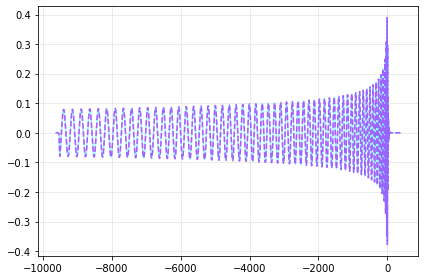

In [30]:
plt.plot(wf2nl.time_axis-mtime, wf2nl.mode(2, 2).real, label='n', linestyle='--', c='magenta')
plt.plot(wf2.time_axis, wf2.mode(2, 2).real, label='wf', alpha=0.4, c='cyan')
plt.show()

### total duration of data

#### original

In [31]:
wf2nl.time_axis[0]-mtime, wf2nl.time_axis[-1]-mtime

(-9638.422000046023, 382.2895992695994)

In [32]:
wf2nl.time_axis[-1]- wf2nl.time_axis[0]

10020.711599315622

#### wftools

In [33]:
wf2.time_axis[0], wf2.time_axis[-1]

(-9638.483911248391, 381.9993623589653)

In [34]:
wf2.time_axis[-1] - wf2.time_axis[0]

10020.483273607357

In [35]:
wf2nl.time_axis[-1]- wf2nl.time_axis[0] - wf2.time_axis[-1] + wf2.time_axis[0]

0.22832570826540177

### nrcat

In [36]:
taxis1[0], taxis1[-1]

(-9638.422000046023, 382.2895992695994)

In [37]:
taxis1[-1] - taxis1[0]

10020.711599315622

#### Lengths

In [38]:
wf2nl.data_len, wf2.data_len, len(taxis1), len(taxis2)

(27336, 20042, 27336, 20042)

1. wftools has an axis shorter by 0.2282...M
2. original and nrcat agree
3. original and nrcat have the same lengths.
4. wftools has lesser data points as its resampled.

In [39]:
tt22 = np.arange(taxis1[0], taxis1[-1], wf2.delta_t())

In [40]:
taxis1[-1]

382.2895992695994

In [41]:
tt22[-1]

382.0612735604791

# Compare interpolated modes

In [42]:
taxis1[-1]-taxis1[0], taxis2[-1]-taxis2[0]

(10020.711599315622, 10020.483273607357)

In [157]:
10020.711599315622 - 10020.483273607357

0.22832570826540177

In [ ]:
taxis

In [58]:
help(match_wfs)

Help on function match_wfs in module waveformtools.waveformtools:

match_wfs(all_time_axes, all_waveforms, delta_t='auto')
    Match two waveforms and return the time shift,
    phase shift, normalized waveforms and match coefficient.
    
    Parameters
    ----------
    time_axes: list
            A list containing the time axes
            of the two waveforms
    
    waveforms: list
                A list of two waveforms.
                Each is a 1d array.
    delta_t: float, string, optional
             The time step of the resampled arrays.
             Can be A, B, auto or any float value.
    
    Returns
    -------
    match_details: dict
                    A dictionary containing the
                    i). match coeffient
                    ii). time_shift
                    iii). phase shift in radians
                    iv). normalized, resampled, waveforms and their
                         time-axes.
    
    Note
    ----
    The shifts give by how much the fi

In [126]:
reload_libs()

In [44]:
from waveformtools.waveformtools import match_wfs, roll
from pycbc.types.timeseries import TimeSeries
from pycbc.filter.matchedfilter import match
from waveformtools.waveformtools import taper

# Coarse

Taxis limits
WF1 tmin -9638.399999999452 tmax 382.31159931617003
WF2 tmin -9638.483911248391 tmax 381.9993623589653
-----------------------------------
 Shift information for waveform 2 against 1 

Recovered Time shift: 10020.483273606502
Recovered Phase shift: (0.9999999999988848+1.4935910875912736e-06j), (1.4935910875918286e-06-1.8814023069390556e-16j) in radians
-----------------------------------
20341 20041 20341
-----------------------------------
 Shift information for waveform 2 against 1 

Recovered Time shift: 10170.483023223884
Recovered Phase shift: (1+2.902284508625627e-17j), (2.902284508625627e-17-4.2116276845041485e-34j) in radians
-----------------------------------


<ipython-input-54-413e638070a2>:150: RuntimeWarning: invalid value encountered in divide
  dAmp_frac = (wf1_rAlm - wf2_rAlm)/wf2_rAlm


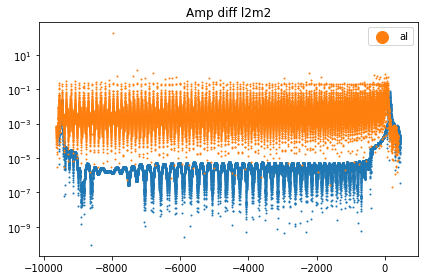

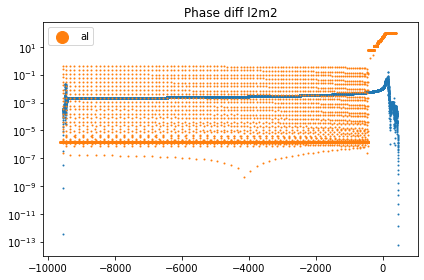

In [54]:
####################
# Compare mode wise
####################

# All un aligned errors
errs = {}

# Flattened un aligned amp 
# and phase errs.
aerrs = []
perrs = []

aerrs_al = []
perrs_al = []

# Convention
# 1 : nrcat
# 2 : wftools
# 1, 2 unaligned
# 3, 4 aligned

# Iterate over modes
for ell in range(2, ell_max+1):
    for emm in range(ell, ell+1):
        
        # Recenter mode time axis
        wf1_tlm = sxsw.get_mode(ell, emm)[:, 0] - mtime
        
        # Check if this mode axis is identical to 
        # time axis of 2, 2 mode.
        if not (wf1_tlm-taxis1==0).all():
            
            print(wf1_tlm - taxis1)
            raise ValueError('Time axis is different across modes!')
            
        # nrcat modes
        wf1_plm = sxsw.get_mode(ell, emm)[:, 1]
        wf1_xlm = sxsw.get_mode(ell, emm)[:, 2]

        wf1_lm = wf1_plm + 1j * wf1_xlm
        
        # wftools modes
        wf2_lm = wf2.mode(ell, emm)
        
        # Align and Compute matches for the + component of 2,2 mode.
        if ell==2 and emm==2:
            both_time_axes = [taxis1, taxis2]
            both_waveforms = [wf1_lm.real, wf2_lm.real]
            match_det = match_wfs(both_time_axes, both_waveforms, delta_t='auto')
            
            wf1_p_al, wf2_p_al = match_det['aligned_waveforms']
            tal = match_det['time']
            
            wf3_Alm, wf3_Plm = xtract_camp_phase(wf1_p_al.real, wf1_p_al.imag)
            wf4_Alm, wf4_Plm = xtract_camp_phase(wf2_p_al.real, wf2_p_al.imag)
        
        # Get Amp phase unaligned
        wf1_Alm, wf1_Plm = xtract_camp_phase(wf1_lm.real, wf1_lm.imag)
        wf2_Alm, wf2_Plm = xtract_camp_phase(wf2_lm.real, wf2_lm.imag)
        
        # Resample the axis in amp, phase
        wf1_rAlm = interp_resam_wfs(wf1_Alm, taxis1, taxis, resam_kind='cubic')
        # Indentity transformation sanity check
        wf1_rAlm2 = interp_resam_wfs(wf1_rAlm, taxis, taxis, resam_kind='cubic')
        
        # Amp deviation of identity transformation
        dd = wf1_rAlm2-wf1_rAlm
        
        # wf2 amp resample
        wf2_rAlm = interp_resam_wfs(wf2_Alm, taxis2, taxis, resam_kind='cubic')
        
        
        # phase resample
        wf1_rPlm = interp_resam_wfs(wf1_Plm, taxis1, taxis, resam_kind='cubic')
        wf2_rPlm = interp_resam_wfs(wf2_Plm, taxis2, taxis, resam_kind='cubic')
        
        
        c1 = np.argmax(wf1_rAlm)
        c2 = np.argmax(wf2_rAlm)
        
        if c1!=c2:
            print(c1, c2)
            #raise ValueError('Time axes are not centered!')
            print(f'Time axes are not centered! Diff is {c2-c1} \n Centering...')
            
            wf1_rAlm = roll(wf1_rAlm, c2-c1)
            wf1_rPlm = roll(wf1_rPlm, c2-c1)
            
            
            #wf1_rlm = wf1_rAlm*np.exp(1j*wf1_rPlm)
            
        # Recombine amp and phases
        wf1_rlm = wf1_rAlm*np.exp(1j*wf1_rPlm)
        wf2_rlm = wf2_rAlm*np.exp(1j*wf2_rPlm)
        
        # Common time stepping
        dt = taxis[1] - taxis[0]
        
        # Taper
        # Note: this is necessary for good co alignment
        wf1_rlm_re = taper(wf1_rlm.real, delta_t=dt)
        wf1_rlm_im = taper(wf1_rlm.imag, delta_t=dt)
        
        wf2_rlm_re = taper(wf2_rlm.real, delta_t=dt)
        wf2_rlm_im = taper(wf2_rlm.imag, delta_t=dt)
        
        # post taper ts
        taxis_t = wf1_rlm_re.sample_times
        taxis_t = taxis_t - taxis_t[c2]
        
        #print(taxis_t)
        
        # Recombine
        wf1_rlm = np.array(wf1_rlm_re) + 1j*np.array(wf1_rlm_im)
        wf2_rlm = np.array(wf2_rlm_re) + 1j*np.array(wf2_rlm_im)
        
        
        wf1_rAlm, wf1_rPlm = xtract_camp_phase(wf1_rlm.real, wf1_rlm.imag)
        wf2_rAlm, wf2_rPlm = xtract_camp_phase(wf2_rlm.real, wf2_rlm.imag)
        print(len(wf1_rlm), len(taxis), len(taxis_t))
        
        
        
        ##############################
        # Match via waveformtools
        ##############################
        
        dt = taxis[1] - taxis[0]
        both_time_axes = [taxis_t, taxis_t]
        both_waveforms = [wf1_rlm.real, wf2_rlm.real]
        
        match_det_r = match_wfs(both_time_axes, both_waveforms, delta_t='A')
        
        #################################
        # Match via pycbc
        #################################
        
        wpf1 = TimeSeries(wf1_rlm.real, delta_t=dt)
        wpf2 = TimeSeries(wf2_rlm.real, delta_t=dt)
            
        mpcbc = match(wpf1, wpf2)
        
            
        #print(wf1_phase_lm, wf2_phase_lm)
        
        ########################################
        # Difference
        ########################################
        
        dAmp_frac = (wf1_rAlm - wf2_rAlm)/wf2_rAlm
        
        dAmp_frac_al = (wf3_Alm - wf4_Alm)/wf3_Alm
        
        if np.mean(np.diff(wf1_rPlm[100:]))<0:
            wf1_rPlm = -wf1_rPlm
            
        if np.mean(np.diff(wf2_rPlm[100:]))<0:
            wf2_rPlm = -wf2_rPlm
        
        if np.mean(np.diff(wf3_Plm[100:]))<0:
            wf3_Plm = -wf3_Plm
            
        if np.mean(np.diff(wf4_Plm[100:]))<0:
            wf4_Plm = -wf4_Plm
            
        #sign1 = abs(wf1_phase_lm[-1])/wf1_phase_lm[-1]
        #sign2 = abs(wf2_phase_lm[-1])/wf2_phase_lm[-1]
        
        dphase = wf1_rPlm - wf2_rPlm
        dphase_al = (wf3_Plm - wf4_Plm) + 2*np.pi #%(round(np.pi, 4))
        
        #print(dphase_al)
        
        res_amp, _, _ = RMSerrs(wf1_rAlm, wf2_rAlm)
        res_amp_al, _, _ = RMSerrs(wf3_Alm, wf4_Alm)
        
        res_phase, _, _ = RMSerrs(wf1_rPlm, wf2_rPlm)
        res_phase_al, _, _ = RMSerrs(wf3_Plm, wf4_Plm)
        
        aerrs.append(res_amp)
        aerrs_al.append(res_amp_al)
        
        perrs.append(res_phase)
        perrs_al.append(res_phase_al)
        
        errs.update({f'l{ell}m{emm}' : [res_amp, res_phase]})
        
        ###############################
        # Plots
        ###############################
        
        fig, ax = plt.subplots()
        ax.set_yscale('log')
        
        ax.scatter(taxis_t, np.absolute(dAmp_frac), s=1)
        ax.scatter(tal, np.absolute(dAmp_frac_al), label='al', s=1)
        ax.set_title(f'Amp diff l{ell}m{emm}')
        plt.grid()
        plt.legend()
        plt.show()
        
        fig, ax = plt.subplots()
        ax.set_yscale('log')
        ax.scatter(taxis_t, np.absolute(dphase),  s=1)
        ax.scatter(tal, np.absolute(dphase_al), label='al', s=1)
        ax.set_title(f'Phase diff l{ell}m{emm}')
        plt.legend()
        plt.grid()
        plt.show()

In [55]:
aerrs

[0.00015620668422717702]

# Fine

/home/vaishakprasad/Documents/Codes/waveformtools/waveformtools/waveformtools.py:2410: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta_t = mode(np.diff(sorted(time_axis1)))[0][0]


Taxis limits
WF1 tmin -9638.399999999452 tmax 382.31159931617003
WF2 tmin -9638.483911248391 tmax 381.9993623589653
-----------------------------------
 Shift information for waveform 2 against 1 

Recovered Time shift: 10020.483273606502
Recovered Phase shift: (0.9999999999988848+1.4935910875912736e-06j), (1.4935910875918286e-06-1.8814023069390556e-16j) in radians
-----------------------------------
192769 192767
Time axes are not centered! Diff is -2 
 Centering...
200709 200409 200709
-----------------------------------
 Shift information for waveform 2 against 1 

Recovered Time shift: 10035.433248542175
Recovered Phase shift: (1+7.920748164670017e-18j), (7.920748164670017e-18-3.1369125744061724e-35j) in radians
-----------------------------------


<ipython-input-57-413e638070a2>:150: RuntimeWarning: invalid value encountered in divide
  dAmp_frac = (wf1_rAlm - wf2_rAlm)/wf2_rAlm


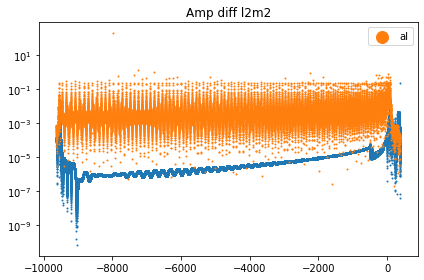

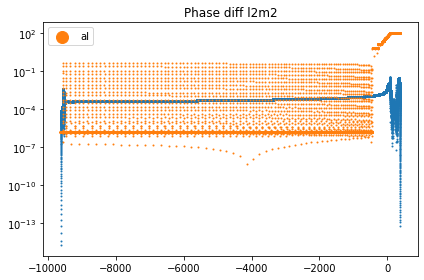

In [57]:
####################
# Compare mode wise
####################

# All un aligned errors
errs = {}

# Flattened un aligned amp 
# and phase errs.
aerrs = []
perrs = []

aerrs_al = []
perrs_al = []

# Convention
# 1 : nrcat
# 2 : wftools
# 1, 2 unaligned
# 3, 4 aligned

# Iterate over modes
for ell in range(2, ell_max+1):
    for emm in range(ell, ell+1):
        
        # Recenter mode time axis
        wf1_tlm = sxsw.get_mode(ell, emm)[:, 0] - mtime
        
        # Check if this mode axis is identical to 
        # time axis of 2, 2 mode.
        if not (wf1_tlm-taxis1==0).all():
            
            print(wf1_tlm - taxis1)
            raise ValueError('Time axis is different across modes!')
            
        # nrcat modes
        wf1_plm = sxsw.get_mode(ell, emm)[:, 1]
        wf1_xlm = sxsw.get_mode(ell, emm)[:, 2]

        wf1_lm = wf1_plm + 1j * wf1_xlm
        
        # wftools modes
        wf2_lm = wf2.mode(ell, emm)
        
        # Align and Compute matches for the + component of 2,2 mode.
        if ell==2 and emm==2:
            both_time_axes = [taxis1, taxis2]
            both_waveforms = [wf1_lm.real, wf2_lm.real]
            match_det = match_wfs(both_time_axes, both_waveforms, delta_t='auto')
            
            wf1_p_al, wf2_p_al = match_det['aligned_waveforms']
            tal = match_det['time']
            
            wf3_Alm, wf3_Plm = xtract_camp_phase(wf1_p_al.real, wf1_p_al.imag)
            wf4_Alm, wf4_Plm = xtract_camp_phase(wf2_p_al.real, wf2_p_al.imag)
        
        # Get Amp phase unaligned
        wf1_Alm, wf1_Plm = xtract_camp_phase(wf1_lm.real, wf1_lm.imag)
        wf2_Alm, wf2_Plm = xtract_camp_phase(wf2_lm.real, wf2_lm.imag)
        
        # Resample the axis in amp, phase
        wf1_rAlm = interp_resam_wfs(wf1_Alm, taxis1, taxis, resam_kind='cubic')
        # Indentity transformation sanity check
        wf1_rAlm2 = interp_resam_wfs(wf1_rAlm, taxis, taxis, resam_kind='cubic')
        
        # Amp deviation of identity transformation
        dd = wf1_rAlm2-wf1_rAlm
        
        # wf2 amp resample
        wf2_rAlm = interp_resam_wfs(wf2_Alm, taxis2, taxis, resam_kind='cubic')
        
        
        # phase resample
        wf1_rPlm = interp_resam_wfs(wf1_Plm, taxis1, taxis, resam_kind='cubic')
        wf2_rPlm = interp_resam_wfs(wf2_Plm, taxis2, taxis, resam_kind='cubic')
        
        
        c1 = np.argmax(wf1_rAlm)
        c2 = np.argmax(wf2_rAlm)
        
        if c1!=c2:
            print(c1, c2)
            #raise ValueError('Time axes are not centered!')
            print(f'Time axes are not centered! Diff is {c2-c1} \n Centering...')
            
            wf1_rAlm = roll(wf1_rAlm, c2-c1)
            wf1_rPlm = roll(wf1_rPlm, c2-c1)
            
            
            #wf1_rlm = wf1_rAlm*np.exp(1j*wf1_rPlm)
            
        # Recombine amp and phases
        wf1_rlm = wf1_rAlm*np.exp(1j*wf1_rPlm)
        wf2_rlm = wf2_rAlm*np.exp(1j*wf2_rPlm)
        
        # Common time stepping
        dt = taxis[1] - taxis[0]
        
        # Taper
        # Note: this is necessary for good co alignment
        wf1_rlm_re = taper(wf1_rlm.real, delta_t=dt)
        wf1_rlm_im = taper(wf1_rlm.imag, delta_t=dt)
        
        wf2_rlm_re = taper(wf2_rlm.real, delta_t=dt)
        wf2_rlm_im = taper(wf2_rlm.imag, delta_t=dt)
        
        # post taper ts
        taxis_t = wf1_rlm_re.sample_times
        taxis_t = taxis_t - taxis_t[c2]
        
        #print(taxis_t)
        
        # Recombine
        wf1_rlm = np.array(wf1_rlm_re) + 1j*np.array(wf1_rlm_im)
        wf2_rlm = np.array(wf2_rlm_re) + 1j*np.array(wf2_rlm_im)
        
        
        wf1_rAlm, wf1_rPlm = xtract_camp_phase(wf1_rlm.real, wf1_rlm.imag)
        wf2_rAlm, wf2_rPlm = xtract_camp_phase(wf2_rlm.real, wf2_rlm.imag)
        print(len(wf1_rlm), len(taxis), len(taxis_t))
        
        
        
        ##############################
        # Match via waveformtools
        ##############################
        
        dt = taxis[1] - taxis[0]
        both_time_axes = [taxis_t, taxis_t]
        both_waveforms = [wf1_rlm.real, wf2_rlm.real]
        
        match_det_r = match_wfs(both_time_axes, both_waveforms, delta_t='A')
        
        #################################
        # Match via pycbc
        #################################
        
        wpf1 = TimeSeries(wf1_rlm.real, delta_t=dt)
        wpf2 = TimeSeries(wf2_rlm.real, delta_t=dt)
            
        mpcbc = match(wpf1, wpf2)
        
            
        #print(wf1_phase_lm, wf2_phase_lm)
        
        ########################################
        # Difference
        ########################################
        
        dAmp_frac = (wf1_rAlm - wf2_rAlm)/wf2_rAlm
        
        dAmp_frac_al = (wf3_Alm - wf4_Alm)/wf3_Alm
        
        if np.mean(np.diff(wf1_rPlm[100:]))<0:
            wf1_rPlm = -wf1_rPlm
            
        if np.mean(np.diff(wf2_rPlm[100:]))<0:
            wf2_rPlm = -wf2_rPlm
        
        if np.mean(np.diff(wf3_Plm[100:]))<0:
            wf3_Plm = -wf3_Plm
            
        if np.mean(np.diff(wf4_Plm[100:]))<0:
            wf4_Plm = -wf4_Plm
            
        #sign1 = abs(wf1_phase_lm[-1])/wf1_phase_lm[-1]
        #sign2 = abs(wf2_phase_lm[-1])/wf2_phase_lm[-1]
        
        dphase = wf1_rPlm - wf2_rPlm
        dphase_al = (wf3_Plm - wf4_Plm) + 2*np.pi #%(round(np.pi, 4))
        
        #print(dphase_al)
        
        res_amp, _, _ = RMSerrs(wf1_rAlm, wf2_rAlm)
        res_amp_al, _, _ = RMSerrs(wf3_Alm, wf4_Alm)
        
        res_phase, _, _ = RMSerrs(wf1_rPlm, wf2_rPlm)
        res_phase_al, _, _ = RMSerrs(wf3_Plm, wf4_Plm)
        
        aerrs.append(res_amp)
        aerrs_al.append(res_amp_al)
        
        perrs.append(res_phase)
        perrs_al.append(res_phase_al)
        
        errs.update({f'l{ell}m{emm}' : [res_amp, res_phase]})
        
        ###############################
        # Plots
        ###############################
        
        fig, ax = plt.subplots()
        ax.set_yscale('log')
        
        ax.scatter(taxis_t, np.absolute(dAmp_frac), s=1)
        ax.scatter(tal, np.absolute(dAmp_frac_al), label='al', s=1)
        ax.set_title(f'Amp diff l{ell}m{emm}')
        plt.grid()
        plt.legend()
        plt.show()
        
        fig, ax = plt.subplots()
        ax.set_yscale('log')
        ax.scatter(taxis_t, np.absolute(dphase),  s=1)
        ax.scatter(tal, np.absolute(dphase_al), label='al', s=1)
        ax.set_title(f'Phase diff l{ell}m{emm}')
        plt.legend()
        plt.grid()
        plt.show()

In [58]:
aerrs

[2.3424841031219603e-05]

In [154]:
np.amax(np.absolute(dd))

1.1102230246251565e-16

In [135]:
#rr = dphase_al%(round(np.pi, 4))
rr = dphase_al%(round(np.pi, 4))

In [136]:
np.amax(rr[:-2000])

3.1415987461708696

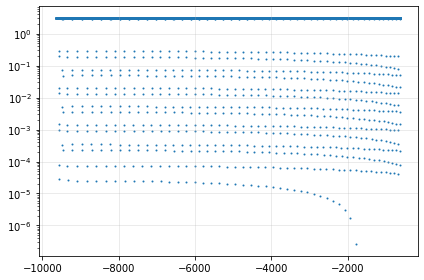

In [137]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.scatter(taxis[:-2000], np.absolute(rr)[:-2000], s=1)
plt.show()

In [110]:
dphase_al

array([  -6.28318577,   -6.28318577,   -6.28318577, ..., -106.81415069,
       -106.81415069, -106.81415069])

In [90]:
2*np.pi

6.283185307179586

In [88]:
-5%2

1

In [68]:
len(wf1_rlm), len(wf2_rlm)

(20341, 20341)

In [69]:
len(taxis1), len(taxis2)

(27336, 20042)

In [70]:
(taxis==taxis).all()

True

In [139]:
match_det

{'match_score': (0.9999736426643315-2.2090628368524087e-09j),
 'time_shift': 10020.483273606502,
 'phase_shift': (4.641602365800776e-07+8.029308006784993e-17j),
 'time': array([-9638.42200005, -9637.92200088, -9637.42200172, ...,
          380.56127606,   381.06127523,   381.5612744 ]),
 'aligned_waveforms': [array([-4.11854913e-05+5.04376801e-21j, -4.13605107e-05+5.06520171e-21j,
         -4.15265660e-05+5.08553762e-21j, ...,
         -3.36432633e-05+1.90607217e-20j, -3.36701908e-05-2.57817277e-20j,
         -3.36890176e-05-1.08352144e-20j]),
  array([-4.12082611e-05-1.91272381e-11j, -4.13821654e-05-1.92079571e-11j,
         -4.15471231e-05-1.92845202e-11j, ...,
         -3.36474426e-05-1.56178022e-11j, -3.36734612e-05-1.56298798e-11j,
         -3.36911537e-05-1.56380875e-11j])]}

In [140]:
match_det_r

{'match_score': (0.9999820173469474-2.5885746243212014e-16j),
 'time_shift': 10170.483023223884,
 'phase_shift': (2.5471794527043684e-17-3.244061582139663e-34j),
 'time': <pycbc.types.array.Array at 0x7f1646c09030>,
 'aligned_waveforms': [array([0., 0., 0., ..., 0., 0., 0.]),
  array([-3.44825967e-18+2.62724547e-18j, -6.56841791e-18+1.96941965e-18j,
         -1.31245590e-18-1.88914385e-18j, ...,
          5.86104940e-19+6.56893471e-18j, -3.29825810e-19+2.29863646e-18j,
          2.79149899e-18-3.27974550e-19j])]}

In [73]:
mpcbc

(0.9999896379725594, 0)

In [33]:
match_det['aligned_waveforms']

AttributeError: 'list' object has no attribute 'shape'

In [48]:
aerrs

[0.00011800049026899875,
 0.00120426337419995,
 0.0006263261842674825,
 0.001204338684992862,
 0.00011800048751826744]

In [20]:
aerrs

[0.00012328781212757136,
 0.0012617350984736931,
 0.0006562770102097067,
 0.001261814056259354,
 0.00012328780926355184]

In [21]:
perrs

[1.0795154715408885e-05,
 0.005724805215687272,
 0.001517445986036489,
 0.00011681051244185069,
 1.096716745383547e-05]

# Compare run 2

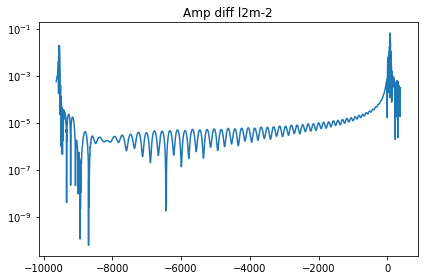

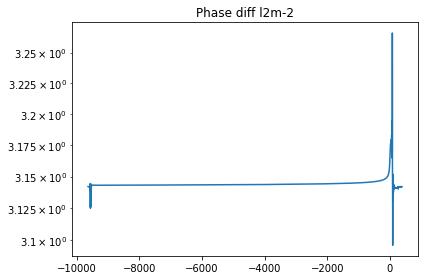

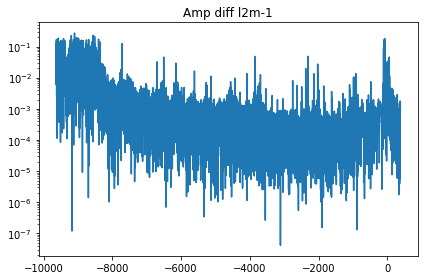

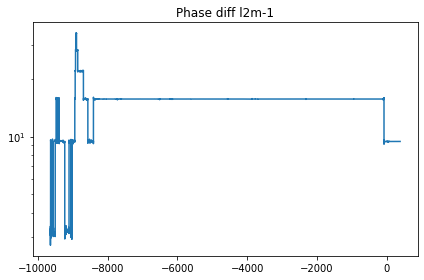

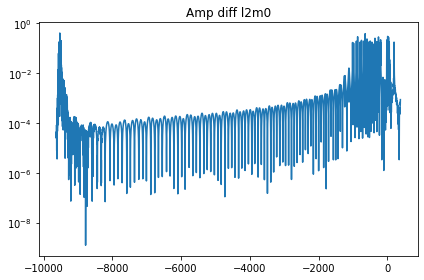

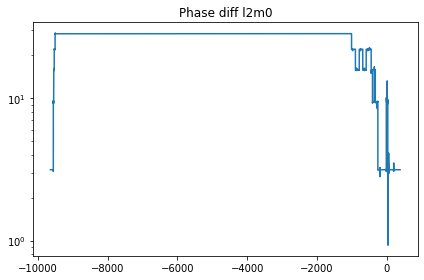

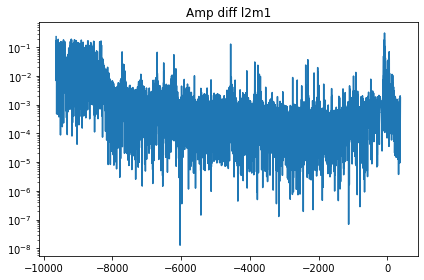

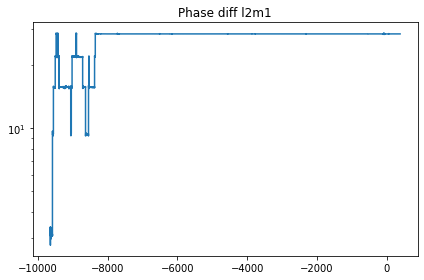

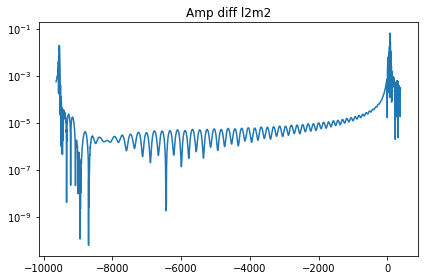

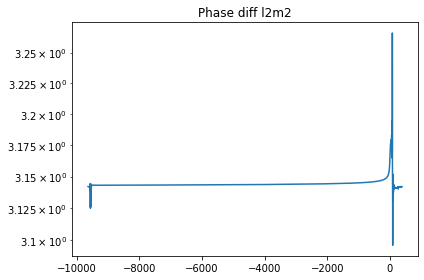

In [83]:
####################
# Compare mode wise
####################

errs = {}

aerrs = []
perrs = []

for ell in range(2, ell_max+1):
    for emm in range(-ell, ell+1):
        
        wf1_tlm = sxsw.get_mode(ell, emm)[:, 0] - mtime
        
        if not (wf1_tlm-taxis1==0).all():
            
            print(wf1_tlm - taxis1)
            raise ValueError('Time axis is different across modes!')
            
        # nrcat   
        wf1_plm = sxsw.get_mode(ell, emm)[:, 1]
        wf1_xlm = sxsw.get_mode(ell, emm)[:, 2]

        wf1_lm = wf1_plm + 1j * wf1_xlm
        wf2_lm = wf2.mode(ell, emm)
        
        wf1_Alm, wf1_Plm = xtract_camp_phase(wf1_lm.real, wf1_lm.imag)
        wf2_Alm, wf2_Plm = xtract_camp_phase(wf2_lm.real, wf2_lm.imag)
        
        
        wf1_rAlm = interp_resam_wfs(wf1_Alm, taxis1, taxis, resam_kind='cubic')
        wf2_rAlm = interp_resam_wfs(wf2_Alm, taxis2, taxis, resam_kind='cubic')
        
        wf1_rPlm = interp_resam_wfs(wf1_Plm, taxis1, taxis, resam_kind='cubic')
        wf2_rPlm = interp_resam_wfs(wf2_Plm, taxis2, taxis, resam_kind='cubic')
        
        if np.argmax(wf1_rAlm)!=np.argmax(wf2_rAlm):
            raise ValueError('Time axes are not centered!')
            
        #print(wf1_phase_lm, wf2_phase_lm)
        # Difference
        
        dAmp_frac = (wf1_rAlm - wf2_rAlm)/wf2_rAlm
            
        if np.mean(np.diff(wf1_rPlm))<0:
            wf1_rPlm = -wf1_rPlm
            
        if np.mean(np.diff(wf2_rPlm))<0:
            wf2_rPlm = -wf2_rPlm
            
        #sign1 = abs(wf1_phase_lm[-1])/wf1_phase_lm[-1]
        #sign2 = abs(wf2_phase_lm[-1])/wf2_phase_lm[-1]
        
        dphase = wf1_rPlm - wf2_rPlm
        
        res_amp, _, _ = RMSerrs(wf1_rAlm, wf2_rAlm)
        
        res_phase, _, _ = RMSerrs(wf1_rPlm, wf2_rPlm)
        
        aerrs.append(res_amp)
        perrs.append(res_phase)
        
        errs.update({f'l{ell}m{emm}' : [res_amp, res_phase]})
        
        fig, ax = plt.subplots()
        ax.set_yscale('log')
        
        ax.plot(taxis, np.absolute(dAmp_frac))
        ax.set_title(f'Amp diff l{ell}m{emm}')
        plt.grid()
        plt.show()
        
        fig, ax = plt.subplots()
        ax.set_yscale('log')
        ax.plot(taxis, np.absolute(dphase))
        ax.set_title(f'Phase diff l{ell}m{emm}')
        plt.grid()
        plt.show()

In [75]:
aerrs

[0.00011628991864300575,
 0.0012608177426574265,
 0.0006563802121147223,
 0.0012608972351167156,
 0.00011628991612901783]

In [76]:
perrs

[0.007848585795914981,
 0.06442144137191105,
 1.6894894685524853,
 0.12413094585557269,
 0.0079736469876789]

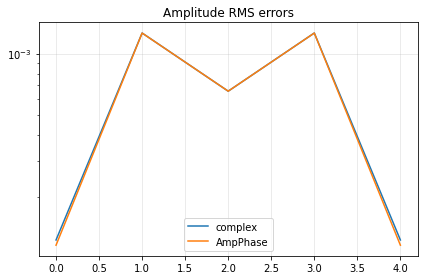

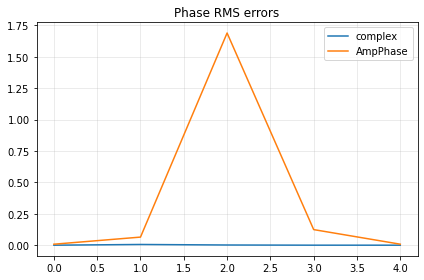

In [87]:
e1 = [0.00011628991864300575,
 0.0012608177426574265,
 0.0006563802121147223,
 0.0012608972351167156,
 0.00011628991612901783]

e0 = [0.00012328781212757136,
 0.0012617350984736931,
 0.0006562770102097067,
 0.001261814056259354,
 0.00012328780926355184]

p1 = [0.007848585795914981,
 0.06442144137191105,
 1.6894894685524853,
 0.12413094585557269,
 0.0079736469876789]

p0 = [1.0795154715408885e-05,
 0.005724805215687272,
 0.001517445986036489,
 0.00011681051244185069,
 1.096716745383547e-05]

fig , ax = plt.subplots()
ax.set_yscale('log')
ax.plot(e0, label='complex')
ax.plot(e1, label='AmpPhase')
plt.title('Amplitude RMS errors')
plt.legend()
plt.show()

plt.plot(p0, label='complex')
plt.plot(p1, label='AmpPhase')
plt.title('Phase RMS errors')
plt.legend()
plt.show()

1. Interp via Amp phase is more accurate in amp and less in phase. 
2. It also takes significantly more time due to unwrapping.
3. All errors are attributable to interpolation!
4. Here, no systematic alignment over time is being done. Although alignment is being done via max amplitude location, it is insufficuent/ in accurate.
5. The disagreement would reduce with decreasing time stepping.

# Compare raw modes

/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/site-packages/ipykernel/pylab/backend_inline.py:231: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


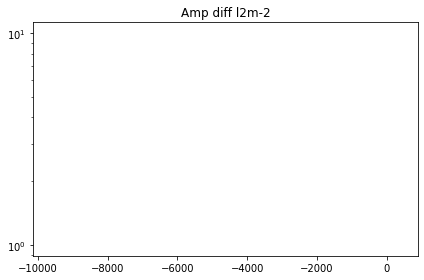

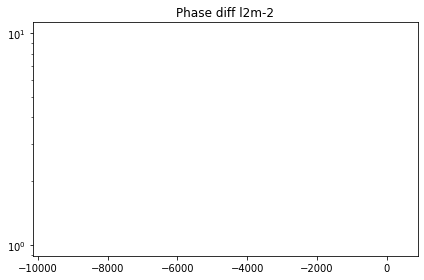

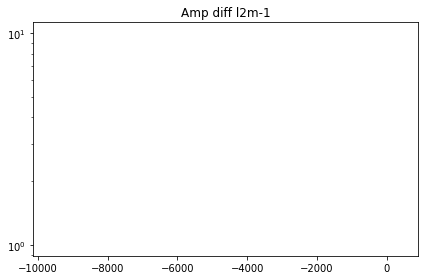

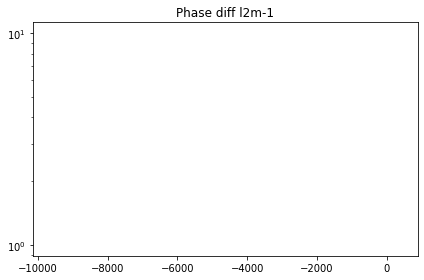

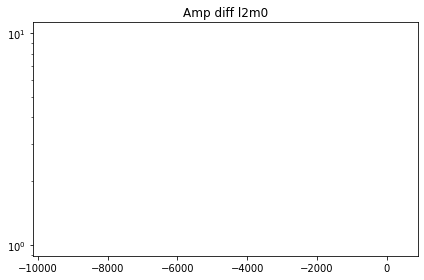

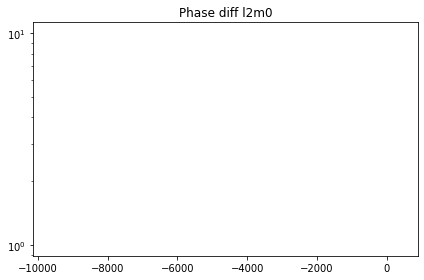

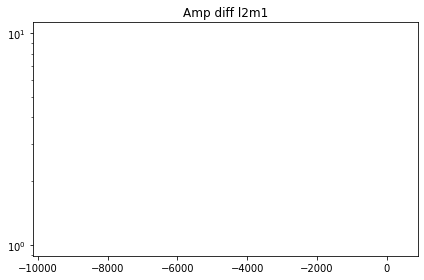

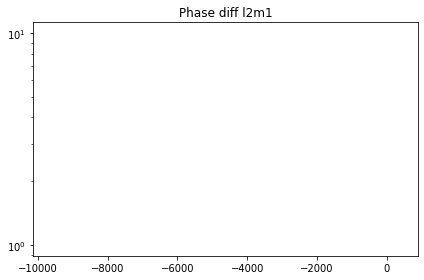

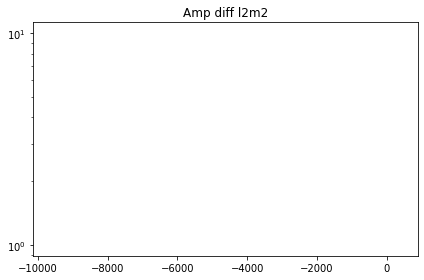

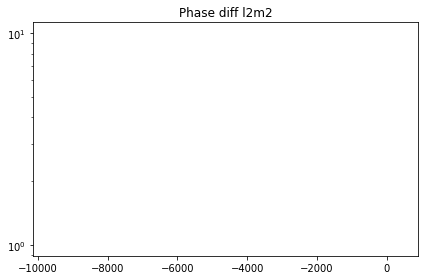

In [62]:
####################
# Compare mode wise
####################

errs = {}

aerrs = []
perrs = []

for ell in range(2, ell_max+1):
    for emm in range(-ell, ell+1):
        
        wf1_tlm = sxsw.get_mode(ell, emm)[:, 0] - mtime
        
        if not (wf1_tlm-taxis1==0).all():
            
            print(wf1_tlm - taxis1)
            raise ValueError('Time axis is different across modes!')
            
        # nrcat   
        wf1_plm = sxsw.get_mode(ell, emm)[:, 1]
        wf1_xlm = sxsw.get_mode(ell, emm)[:, 2]

        wf1_lm = wf1_plm + 1j * wf1_xlm
        
        # waveformtools
        wf2_lm = wf2nl.mode(ell, emm)
        
        wf1_rAlm, wf1_rPlm = xtract_camp_phase(wf1_lm.real, wf1_lm.imag)
        wf2_rAlm, wf2_rPlm = xtract_camp_phase(wf2_lm.real, wf2_lm.imag)
        
        
        #wf1_rAlm = interp_resam_wfs(wf1_Alm, taxis1, taxis, resam_kind='cubic')
        #wf2_rAlm = interp_resam_wfs(wf2_Alm, taxis2, taxis, resam_kind='cubic')
        
        #wf1_rPlm = interp_resam_wfs(wf1_Plm, taxis1, taxis, resam_kind='cubic')
        #wf2_rPlm = interp_resam_wfs(wf2_Plm, taxis2, taxis, resam_kind='cubic')
        
        if np.argmax(wf1_rAlm)!=np.argmax(wf2_rAlm):
            raise ValueError('Time axes are not centered!')
            
        #print(wf1_phase_lm, wf2_phase_lm)
        # Difference
        
        dAmp_frac = (wf1_rAlm - wf2_rAlm)/wf2_rAlm
            
        if np.mean(np.diff(wf1_rPlm))<0:
            wf1_rPlm = -wf1_rPlm
            
        if np.mean(np.diff(wf2_rPlm))<0:
            wf2_rPlm = -wf2_rPlm
            
        #sign1 = abs(wf1_phase_lm[-1])/wf1_phase_lm[-1]
        #sign2 = abs(wf2_phase_lm[-1])/wf2_phase_lm[-1]
        
        dphase = wf1_rPlm - wf2_rPlm
        
        res_amp, _, _ = RMSerrs(wf1_rAlm, wf2_rAlm)
        
        res_phase, _, _ = RMSerrs(wf1_rPlm, wf2_rPlm)
        
        aerrs.append(res_amp)
        perrs.append(res_phase)
        
        errs.update({f'l{ell}m{emm}' : [res_amp, res_phase]})
        
        fig, ax = plt.subplots()
        ax.set_yscale('log')
        
        ax.plot(taxis1, np.absolute(dAmp_frac))
        ax.set_title(f'Amp diff l{ell}m{emm}')
        plt.grid()
        plt.show()
        
        fig, ax = plt.subplots()
        ax.set_yscale('log')
        ax.plot(taxis1, np.absolute(dphase))
        ax.set_title(f'Phase diff l{ell}m{emm}')
        plt.grid()
        plt.show()

In [63]:
aerrs

[0.0, 0.0, 0.0, 0.0, 0.0]

In [64]:
perrs

[0.0, 0.0, 0.0, 0.0, 0.0]

# Compare by 1 dt time shift

In [18]:
from waveformtools.waveformtools import roll

Expected Warning


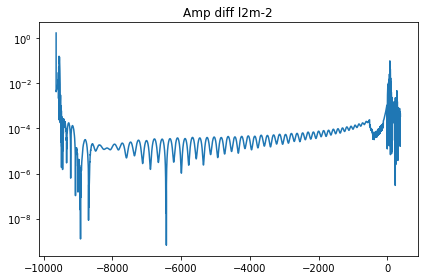

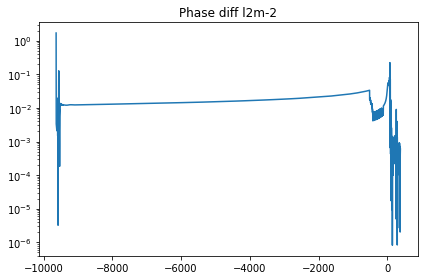

Expected Warning


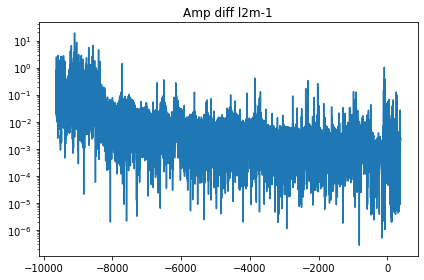

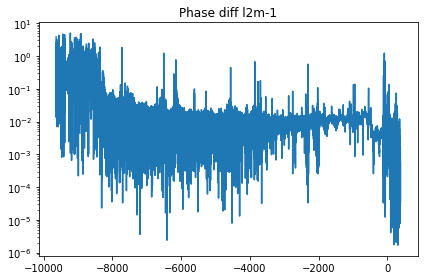

Expected Warning


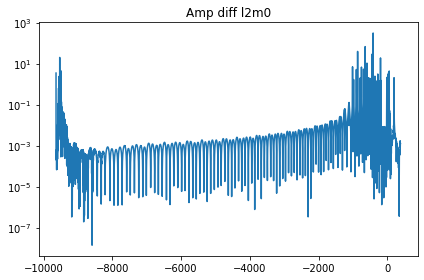

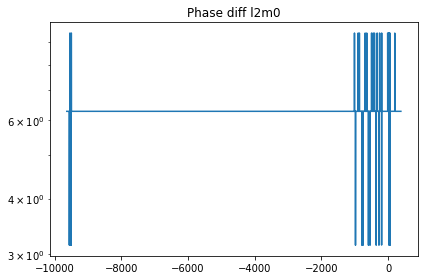

Expected Warning


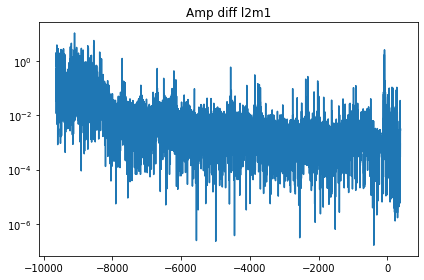

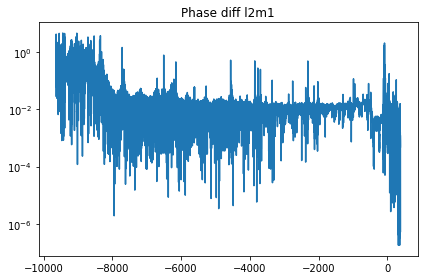

Expected Warning


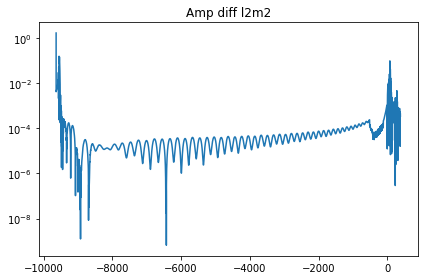

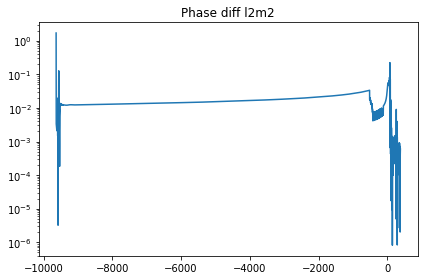

In [21]:
####################
# Compare mode wise
####################

errs = {}

aerrs = []
perrs = []

for ell in range(2, ell_max+1):
    for emm in range(-ell, ell+1):
        
        wf1_tlm = sxsw.get_mode(ell, emm)[:, 0] - mtime
        
        if not (wf1_tlm-taxis1==0).all():
            
            print(wf1_tlm - taxis1)
            raise ValueError('Time axis is different across modes!')
            
        # nrcat   
        wf1_plm = sxsw.get_mode(ell, emm)[:, 1]
        wf1_xlm = sxsw.get_mode(ell, emm)[:, 2]

        wf1_lm = wf1_plm + 1j * wf1_xlm
        
        wf2_lm = roll(wf1_lm, 1)
        
        wf1_rAlm, wf1_rPlm = xtract_camp_phase(wf1_lm.real, wf1_lm.imag)
        wf2_rAlm, wf2_rPlm = xtract_camp_phase(wf2_lm.real, wf2_lm.imag)
        
        
        #wf1_rAlm = interp_resam_wfs(wf1_Alm, taxis1, taxis, resam_kind='cubic')
        #wf2_rAlm = interp_resam_wfs(wf2_Alm, taxis2, taxis, resam_kind='cubic')
        
        #wf1_rPlm = interp_resam_wfs(wf1_Plm, taxis1, taxis, resam_kind='cubic')
        #wf2_rPlm = interp_resam_wfs(wf2_Plm, taxis2, taxis, resam_kind='cubic')
        
        if np.argmax(wf1_rAlm)!=np.argmax(wf2_rAlm):
            #raise ValueError('Time axes are not centered!')
            print('Expected Warning')
        #print(wf1_phase_lm, wf2_phase_lm)
        # Difference
        
        dAmp_frac = (wf1_rAlm - wf2_rAlm)/wf2_rAlm
            
        if np.mean(np.diff(wf1_rPlm))<0:
            wf1_rPlm = -wf1_rPlm
            
        if np.mean(np.diff(wf2_rPlm))<0:
            wf2_rPlm = -wf2_rPlm
            
        #sign1 = abs(wf1_phase_lm[-1])/wf1_phase_lm[-1]
        #sign2 = abs(wf2_phase_lm[-1])/wf2_phase_lm[-1]
        
        dphase = wf1_rPlm - wf2_rPlm
        
        res_amp, _, _ = RMSerrs(wf1_rAlm, wf2_rAlm)
        
        res_phase, _, _ = RMSerrs(wf1_rPlm, wf2_rPlm)
        
        aerrs.append(res_amp)
        perrs.append(res_phase)
        
        errs.update({f'l{ell}m{emm}' : [res_amp, res_phase]})
        
        fig, ax = plt.subplots()
        ax.set_yscale('log')
        
        ax.plot(taxis1, np.absolute(dAmp_frac))
        ax.set_title(f'Amp diff l{ell}m{emm}')
        plt.grid()
        plt.show()
        
        fig, ax = plt.subplots()
        ax.set_yscale('log')
        ax.plot(taxis1, np.absolute(dphase))
        ax.set_title(f'Phase diff l{ell}m{emm}')
        plt.grid()
        plt.show()

In [22]:
aerrs

[0.00038447597213402975,
 0.008198614140717757,
 0.003233356422661427,
 0.008199082293125161,
 0.0003844759644938301]

In [23]:
perrs

[5.2107442409748106e-05,
 0.0006692232414621191,
 0.4000804555451641,
 0.0007192544877930617,
 5.2937721314822553e-05]

### The errors are only due to resampling!

In [33]:
import unittest


class TestSXS(unittest.TestCase):
    ''' Test loading of SXS waveforms '''
    
    def test_waveforms(self):
        ''' Test the SXS loading of waveforms against 
        that loading using waveformtools. Tested are RMS errors, maximum deviation and mismatches'''
        
      
        
        # L2 errors
        Res_p, Amin_p, Amax_p = RMSerrs(np.array(wf1_p), np.array(wf2_p))
        Res_x, Amin_x, Amax_x = RMSerrs(np.array(wf1_x), np.array(wf2_x))
        
        #Amin_p/=A1max
        #Amin
        # Match
        match_p, shift_p = match(wf1_p, wf2_p)
        match_x, shift_x = match(wf1_x, wf2_x)

        mismatch_p = 100*(1-match_p)
        mismatch_x = 100*(1-match_x)
        
        max_mismatch = max(mismatch_p, mismatch_x)
        
        print(f'Mismatch is {max_mismatch}')
        
        prec = 1
        # RMS error should be less than 0.1 x Amax(wf1)
        self.assertAlmostEqual(Res_p, 0, prec, f"The RMS error between the + components of the waveforms must be atmost 0.1 times Max amplitude of the normalized waveform")
        self.assertAlmostEqual(Res_x, 0, prec, f"The RMS error between the x components of the waveforms must be almost 0.1 times Max amplitude of the normalized waveform")
        
        prec = 0
        # Max relative point-wise deviation w.r.t Amax(wf1) should be less than 1 (100)%
        self.assertAlmostEqual(np.absolute(Amin_p), 0, prec, f"The maximum lower deviation between the + components of the waveforms must be almost 100%")
        self.assertAlmostEqual(np.absolute(Amax_p), 0, prec, f"The maximum upper deviation between the x components of the waveforms must be almost 100%")
        
        self.assertAlmostEqual(np.absolute(Amax_p), 0, prec, f"The maximum upper deviation between the + components of the waveforms must be almost 0")
        self.assertAlmostEqual(np.absolute(Amax_p), 0, prec, f"The maximum upper deviation between the x components of the waveforms must be almost 0")
        
        prec = 1
        # Mismatch should be less than 0.1%
        self.assertAlmostEqual(mismatch_p, 0, prec, f"The mismatch between the + components of the waveforms must be almost 0.1%")
        self.assertAlmostEqual(mismatch_p, 0, prec, f"The mismatch between the x components of the waveforms must be almost 0.1%")

       
        prec=1
        # Full array
        np.testing.assert_almost_equal(wf1, wf2, prec)
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2)

test_waveforms (__main__.TestSXS)
Test the SXS loading of waveforms against ... FAIL

FAIL: test_waveforms (__main__.TestSXS)
Test the SXS loading of waveforms against
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-33-9c1b21c0ed3f>", line 45, in test_waveforms
    self.assertAlmostEqual(mismatch_p, 0, prec, f"The mismatch between the + components of the waveforms must be almost 0.1%")
AssertionError: 1.2988815726585057 != 0 within 1 places (1.2988815726585057 difference) : The mismatch between the + components of the waveforms must be almost 0.1%

----------------------------------------------------------------------
Ran 1 test in 0.040s

FAILED (failures=1)


Mismatch is 1.2988815726585057
